<a href="https://colab.research.google.com/github/Kim-JHyun/RPA_Web/blob/main/web/beautifulsoup-0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

request.text를 이용해 가져온 데이터는 텍스트형태의 html 입니다.

텍스트형태의 데이터에서 원하는 html 태그를 추출할 수 있을까요?

이를 쉽게 할 수 있게 도와주는 녀석이 바로 "뷰티풀수프"입니다.

즉, html을 수프객체로 만들어서 추출하기 쉽게 만들어줘요.

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### BeautifulSoup 사용법

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = 'https://kin.naver.com/search/list.nhn?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'   # 파이썬

response = requests.get(url)

In [ ]:
type(response)

requests.models.Response

In [ ]:
response.text

'\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="ko">\n<head>\n<meta name="referrer" contents="always">\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="description" content="파이썬의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN &#039;질문하기&#039;를 해보세요."/>\n<meta name="viewport" content="width=1024">\n\n<meta name="msapplication-config" content="none" />\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/common.css" />\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/components.css" />\n\n\n\t\n\t\n\t\t<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/other.css">\n\t\n\n\n\n\n\n\n<script>\n\t\n\tvar pcDomain = "kin.naver.com";\n\tvar pcDomainWithProto

In [ ]:
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(soup)

else :
    print(response.status_code)


In [ ]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="파이썬의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221019141501/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var uploa

### 네이버 지식인 크롤링 예제

### 네이버 지식인에 "파이썬"을 검색하면 첫 번째로 나오는 제목을 가져오려면 어떻게 할까요?

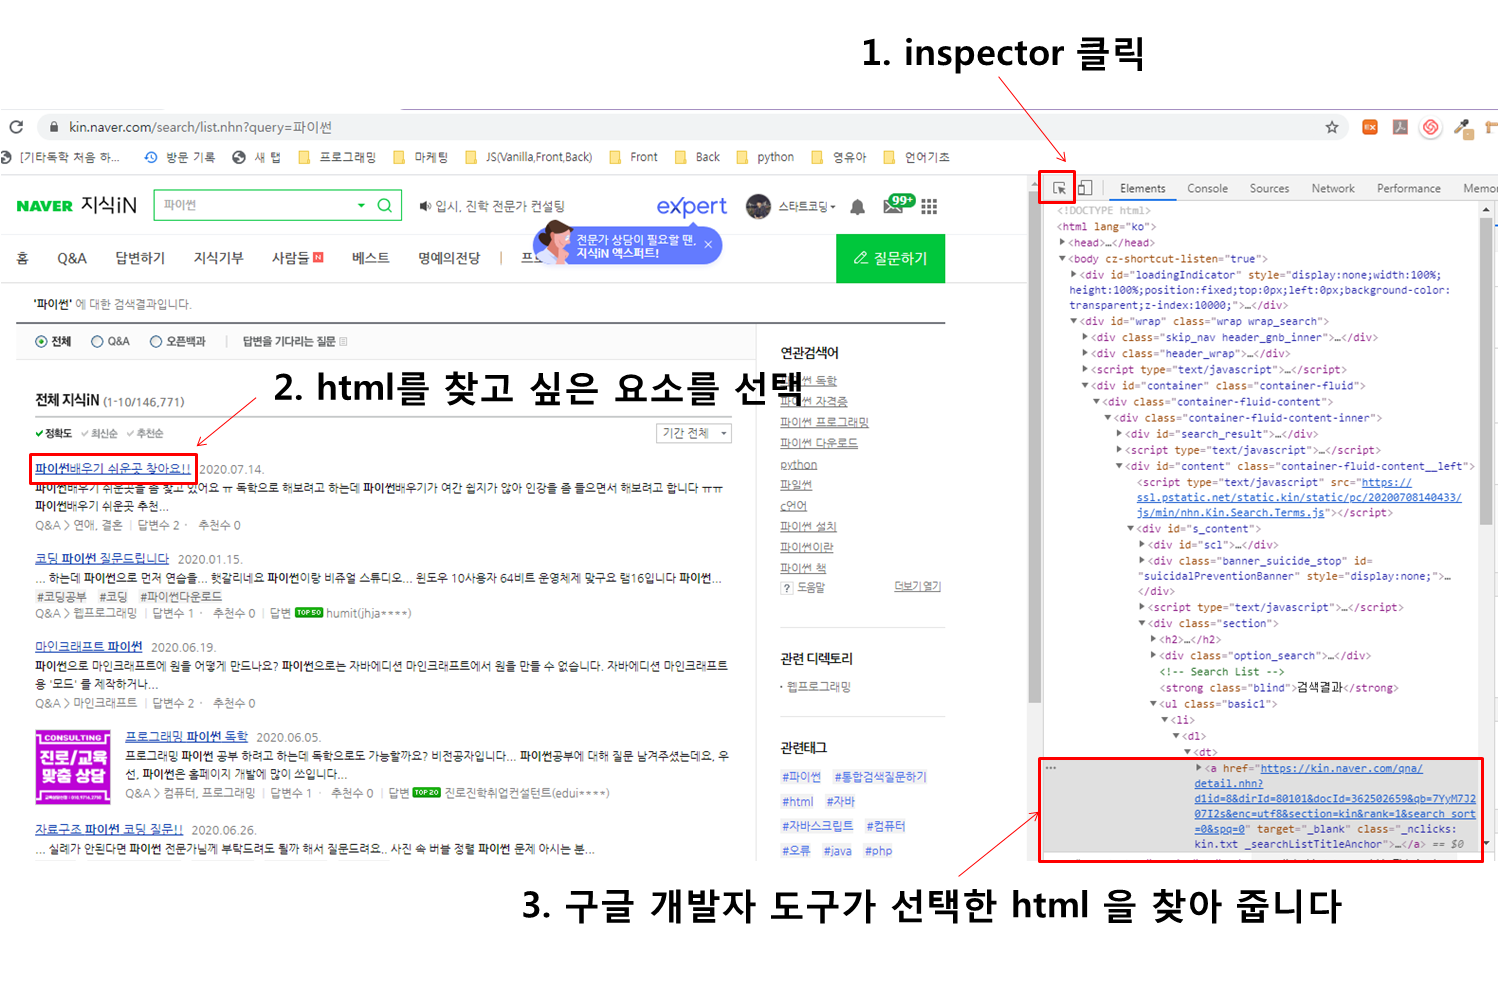

찾은 html에 copy selector 기능을 이용해 봅시다.

Css 선택자를 자동으로 찾아주는 엄청난 기능입니다.

html에 오른쪽 클릭을 한 후 Copy -> Copy Selector 를 선택해 줍니다.

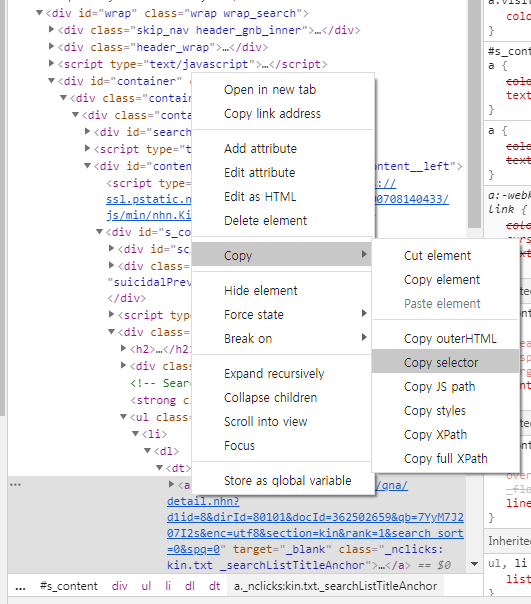

찾은 html에 copy selector 기능을 이용해 봅시다.

Css 선택자를 자동으로 찾아주는 엄청난 기능입니다.

html에 오른쪽 클릭을 한 후 Copy -> Copy Selector 를 선택해 줍니다.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://kin.naver.com/search/list.nhn?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser') # #s_content > div.section > ul > li:nth-child(1) > dl > dt > a
    title = soup.select_one('#s_content > div.section > ul > li:nth-of-type(1) > dl > dt > a')
    # #s_content > div.section > ul > li:nth-child(1) > dl > dt > a
    print(title)
else :
    print(response.status_code)

<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=431493662&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank">제가 <b>파이썬</b>으로 코딩공부를... </a>


select_one 은 하나의 html 요소를 찾는 함수인데, css 선택자를 사용해서 찾을 수 있습니다. 복사한 css 선택자를 select_one 함수의 인자로 넣어주세요.

텍스트만 뽑아오고 싶다면 get_text() 함수를 이용하면 됩니다.

In [ ]:
print(title.get_text())


제가 파이썬으로 코딩공부를... 
